In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
path = os.getcwd()

In [3]:
df = pd.read_csv(path + '/data/pga_ready_for_expla_pca.csv')

In [127]:
top10f = df["Top 10 Finish"] == 1

df10 = df.loc[top10f]

## Customizing Style

In [207]:
# palette:

pga = ["#80C300", "#B5835A", "#2A7FDB", "#D2232A", "#FFFFFF", "#7EC8E3"]

In [134]:
# Font: 

import matplotlib.font_manager as font_manager
from matplotlib.font_manager import fontManager

font_path = path + "/fonts/Oswald-Regular.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Oswald'

In [136]:
# No grids:

plt.rcParams['axes.grid'] = False

In [143]:
# Text colors:

plt.rcParams['text.color'] = '#595959' 

tc = '#595959'

## Assigning names to clusters

In [6]:
# Setting tiers to our clusters based on winnings
#
# We had a little issue, because there was a lot of npnans for wins in our dataset. Less so in Top 10
# so we'll use top tens to rank our clusters. This also makes more sense considering how closely related
# they are to prize money for the players with a corr of 0.9687986087888875
#
# Ranking by money and top 10 gives the listener a pretty good idea of what is going on. So! Let's map it. 

In [ ]:
# S A B C
# A B C D <-- Lets go with this one. 

In [5]:
c1 = df["cluster"] == 1
c2 = df["cluster"] == 2
c3 = df["cluster"] == 3
c4 = df["cluster"] == 4

dfc1 = df.loc[c1]
dfc2 = df.loc[c2]
dfc3 = df.loc[c3]
dfc4 = df.loc[c4]

<Axes: xlabel='cluster', ylabel='Top 10'>

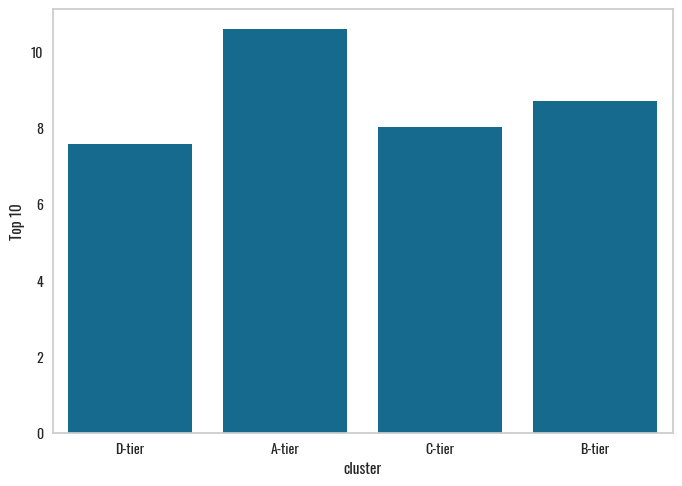

In [138]:
sns.barplot(data=df, x="cluster", y="Top 10", errorbar=None)

In [9]:
df["Top 10"].corr(df["Money"])

0.9687986087888875

In [10]:
df["Wins"].corr(df["Money"])

0.8665678013129251

In [13]:
df["cluster"] = df["cluster"].map({3: "A-tier", 4: "B-tier", 1: "C-tier", 2: "D-tier"})

In [43]:
tier=["A-tier", "B-tier", "C-tier", "D-tier"]

## General Data

/var/folders/j_/__64n8zj7cl2_v79xs0k7lpm0000gn/T/ipykernel_54072/67520785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="cluster", y="Top 10", estimator="mean", errorbar=None,
/var/folders/j_/__64n8zj7cl2_v79xs0k7lpm0000gn/T/ipykernel_54072/67520785.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=df, x="cluster", y="Top 10", estimator="mean", errorbar=None,


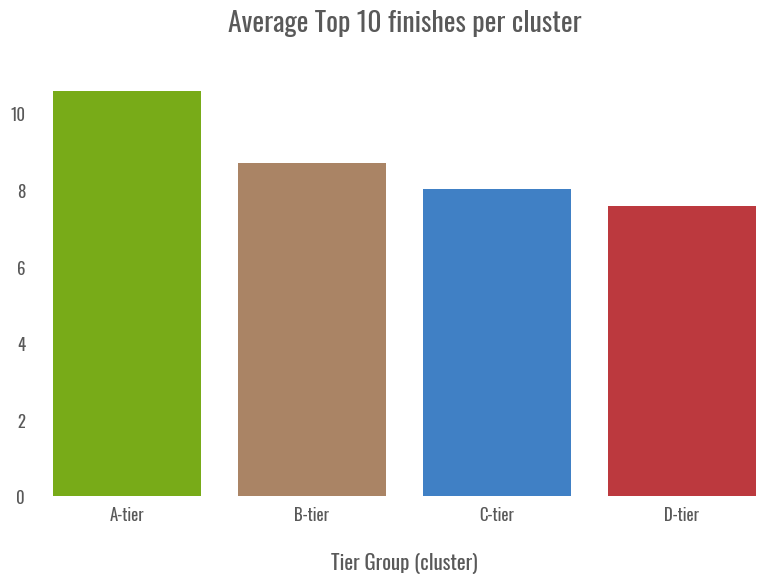

In [208]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="cluster", y="Top 10", estimator="mean", errorbar=None, 
            order=["A-tier", "B-tier", "C-tier", "D-tier"], palette=pga)
plt.title("Average Top 10 finishes per cluster\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("\nTier Group (cluster)", fontsize=15, color = tc)
plt.ylabel("", fontsize=16)

sns.despine(top=True,
    right=True,
    left=True,
    bottom=True,
    offset=None,
    trim=True)

#plt.show()
plt.tight_layout()
plt.savefig(path + "/graphs/avgtop10cluster.png", transparent=True, dpi=300)

In [39]:
df["cluster"].value_counts(normalize=True)

A-tier    0.287671
C-tier    0.255708
B-tier    0.246575
D-tier    0.210046
Name: cluster, dtype: float64

## From the tee

/var/folders/j_/__64n8zj7cl2_v79xs0k7lpm0000gn/T/ipykernel_54072/1354428243.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(data=df, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", hue_order=tier, palette=pga, alpha=.8)


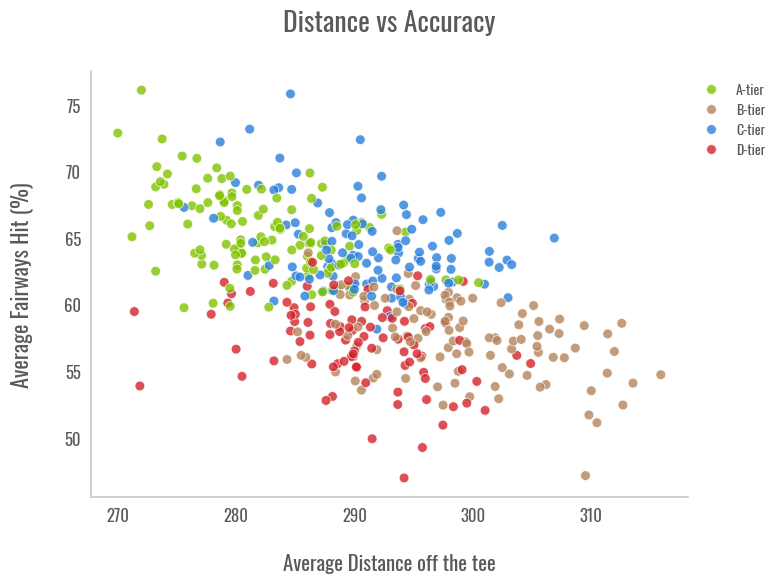

In [209]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", hue_order=tier, palette=pga, alpha=.8)
plt.title("Distance vs Accuracy\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("\nAverage Distance off the tee", fontsize=15, color=tc)
plt.ylabel("Average Fairways Hit (%)\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

sns.despine(top=True,
    right=True,
    left=False,
    bottom=False,
    #offset=None,
    trim=False)

#plt.show()
plt.tight_layout()
plt.savefig(path + "/graphs/acDvA.png", transparent=True, dpi=300)

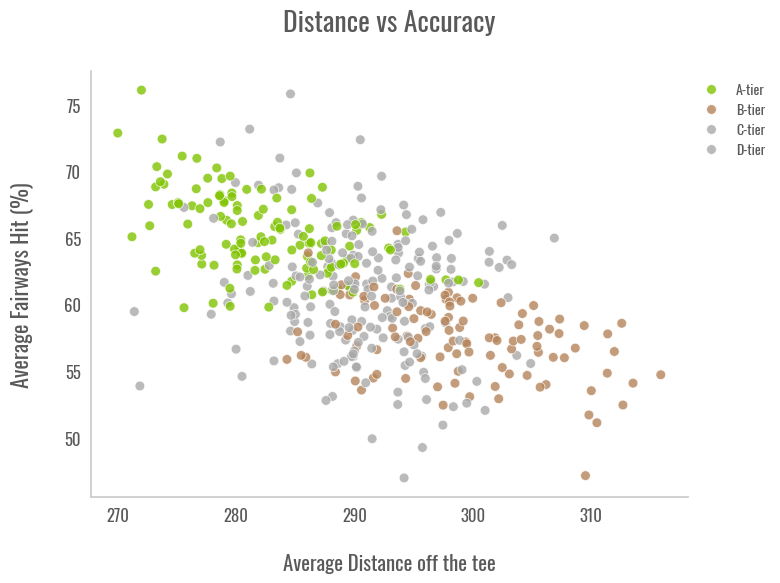

In [210]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", hue_order=tier,
                palette=[pga[0], pga[1], "#A9A9A9", "#A9A9A9"], 
                alpha=.8)
plt.title("Distance vs Accuracy\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("\nAverage Distance off the tee", fontsize=15, color=tc)
plt.ylabel("Average Fairways Hit (%)\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

sns.despine(top=True,
    right=True,
    left=False,
    bottom=False,
    #offset=None,
    trim=False)

#plt.show()
plt.tight_layout()
plt.savefig(path + "/graphs/acDvA-ab.png", transparent=True, dpi=300)

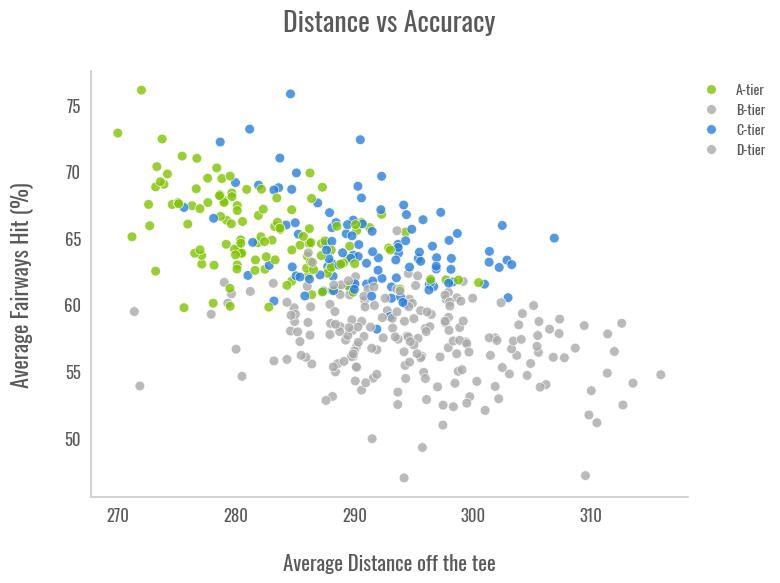

In [211]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", hue_order=tier,
                palette=[pga[0], "#A9A9A9", pga[2], "#A9A9A9"], 
                alpha=.8)
plt.title("Distance vs Accuracy\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("\nAverage Distance off the tee", fontsize=15, color=tc)
plt.ylabel("Average Fairways Hit (%)\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

sns.despine(top=True,
    right=True,
    left=False,
    bottom=False,
    #offset=None,
    trim=False)

#plt.show()
plt.tight_layout()
plt.savefig(path + "/graphs/acDvA-ac.png", transparent=True, dpi=300)

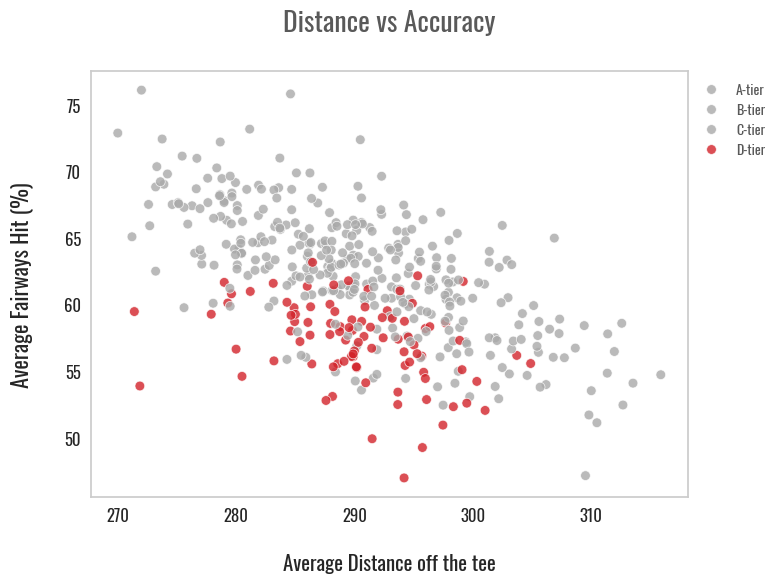

In [212]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", hue_order=tier,
                palette=["#A9A9A9", "#A9A9A9", "#A9A9A9", pga[3]], 
                alpha=.8)
plt.title("Distance vs Accuracy\n", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("\nAverage Distance off the tee", fontsize=15)
plt.ylabel("Average Fairways Hit (%)\n", fontsize=16)
plt.legend(bbox_to_anchor=(1.15, 1))
#plt.show()

plt.tight_layout()
plt.savefig(path + "/graphs/acDvA-d.png", transparent=True, dpi=300)

## Approach towards the green

/var/folders/j_/__64n8zj7cl2_v79xs0k7lpm0000gn/T/ipykernel_54072/720743748.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(data=df, x = "Average Scrambling", y = "gir", hue="cluster", hue_order=tier,


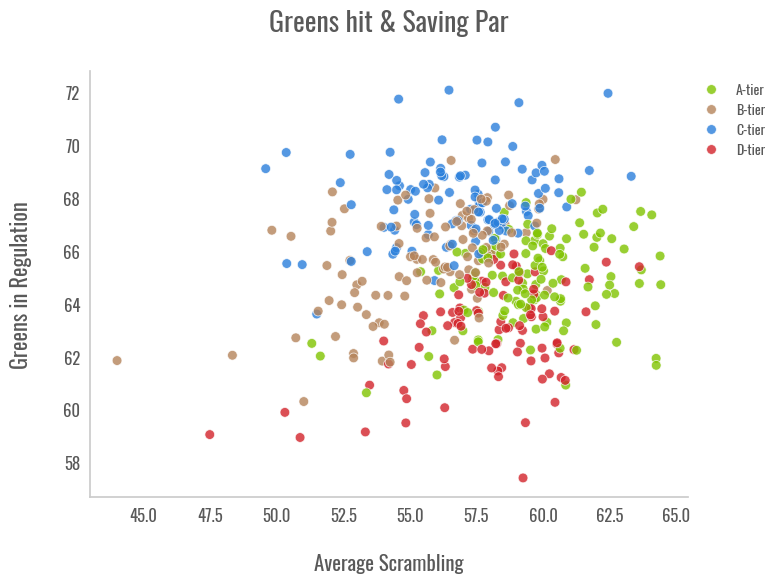

In [213]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = "Average Scrambling", y = "gir", hue="cluster", hue_order=tier,
                palette=pga, 
                alpha=.8)
plt.title("Greens hit & Saving Par\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("\nAverage Scrambling", fontsize=15, color=tc)
plt.ylabel("Greens in Regulation\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))
#plt.show()

sns.despine(top=True,
    right=True,
    left=False,
    bottom=False,
    #offset=None,
    trim=False)

plt.tight_layout()
plt.savefig(path + "/graphs/GvS-a.png", transparent=True, dpi=300)

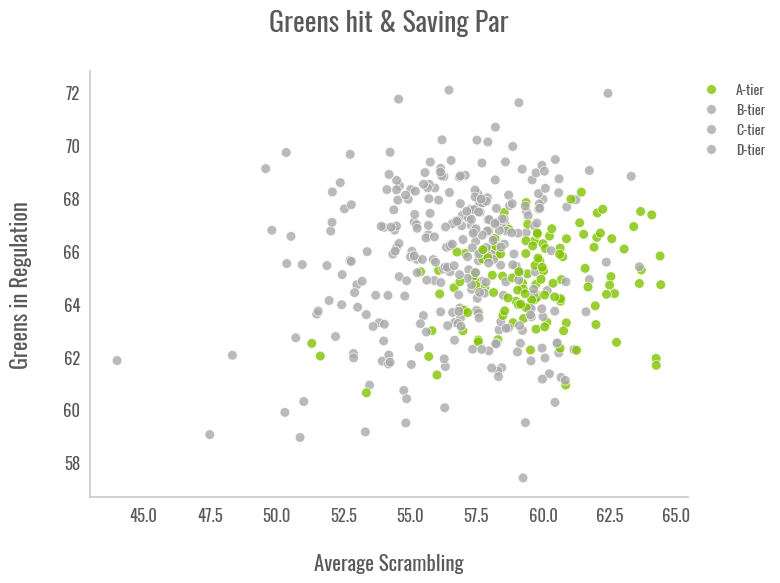

In [214]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = "Average Scrambling", y = "gir", hue="cluster", hue_order=tier,
                palette=[pga[0], "#A9A9A9", "#A9A9A9", "#A9A9A9"], 
                alpha=.8)
plt.title("Greens hit & Saving Par\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("\nAverage Scrambling", fontsize=15, color=tc)
plt.ylabel("Greens in Regulation\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

sns.despine(top=True,
    right=True,
    left=False,
    bottom=False,
    #offset=None,
    trim=False)

plt.tight_layout()
plt.savefig(path + "/graphs/GvS-aa.png", transparent=True, dpi=300)

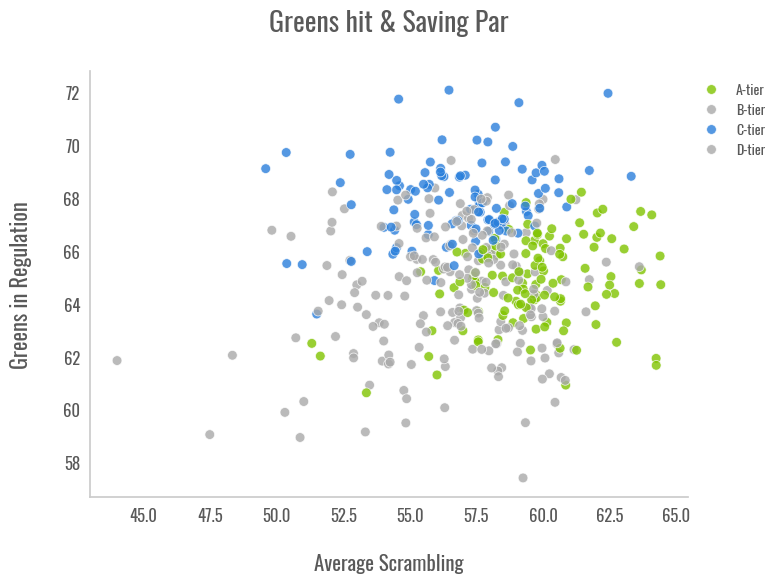

In [215]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = "Average Scrambling", y = "gir", hue="cluster", hue_order=tier,
                palette=[pga[0], "#A9A9A9", pga[2], "#A9A9A9"], 
                alpha=.8)
plt.title("Greens hit & Saving Par\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("\nAverage Scrambling", fontsize=15, color=tc)
plt.ylabel("Greens in Regulation\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

sns.despine(top=True,
    right=True,
    left=False,
    bottom=False,
    #offset=None,
    trim=False)

plt.tight_layout()
plt.savefig(path + "/graphs/GvS-ac.png", transparent=True, dpi=300)

## On the green

/var/folders/j_/__64n8zj7cl2_v79xs0k7lpm0000gn/T/ipykernel_54072/2395126839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y = "Average Putts", x = "cluster", order=tier, palette=pga, errorbar=None)
/var/folders/j_/__64n8zj7cl2_v79xs0k7lpm0000gn/T/ipykernel_54072/2395126839.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=df, y = "Average Putts", x = "cluster", order=tier, palette=pga, errorbar=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


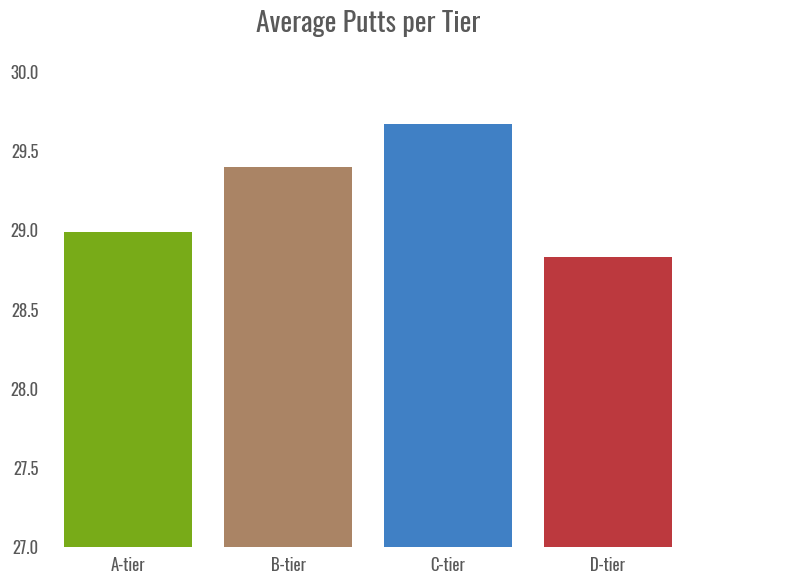

In [216]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, y = "Average Putts", x = "cluster", order=tier, palette=pga, errorbar=None)
plt.title("Average Putts per Tier\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("", fontsize=15)
plt.ylabel("", fontsize=16)
plt.ylim(27, 30)
plt.legend(bbox_to_anchor=(1.15, 1))

sns.despine(top=True,
    right=True,
    left=True,
    bottom=True,
    #offset=None,
    trim=True)

plt.tight_layout()
plt.savefig(path + "/graphs/putt-a.png", transparent=True, dpi=300)

In [ ]:
value_vars=['SG:OTT',
       'SG:APR', 'SG:ARG', 'Average SG Putts', 'cluster']

# Conclusion - SG & Players in each tier

In [117]:
long_df

,cluster,Metric,Value,Cumulative Sum
1315,A-tier,Average SG Putts,0.402000,0.402000
1317,A-tier,Average SG Putts,-0.238500,0.163500
1318,A-tier,Average SG Putts,0.319750,0.483250
1321,A-tier,Average SG Putts,-0.283667,0.199583
1328,A-tier,Average SG Putts,0.322000,0.521583
...,...,...,...,...
415,D-tier,SG:OTT,-0.575200,-21.602222
421,D-tier,SG:OTT,-0.082000,-21.684222
422,D-tier,SG:OTT,-1.171000,-22.855222
423,D-tier,SG:OTT,-0.340500,-23.195722


/var/folders/j_/__64n8zj7cl2_v79xs0k7lpm0000gn/T/ipykernel_54072/3697332783.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=long_df, x='Metric', y='Value', hue='cluster', palette=pga, hue_order=tier, errorbar=None, linewidth=3)


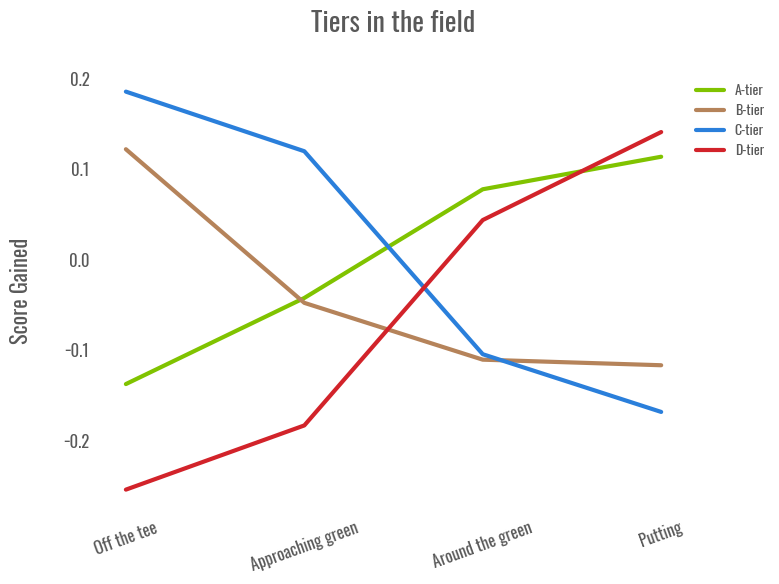

In [217]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['SG:OTT',
       'SG:APR', 'SG:ARG', 'Average SG Putts', 'cluster'],
                  var_name='Metric', value_name='Value')


plt.figure(figsize=(8,6))
sns.lineplot(data=long_df, x='Metric', y='Value', hue='cluster', palette=pga, hue_order=tier, errorbar=None, linewidth=3)
plt.title("Tiers in the field\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("", fontsize=15)
plt.ylabel("Score Gained\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

custom_labels = ['Off the tee', 'Approaching green', 'Around the green', 'Putting']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=20)

sns.despine(top=True,
    right=True,
    left=True,
    bottom=True,
    #offset=None,
    trim=True)

#plt.show()

plt.tight_layout()
plt.savefig(path + "/graphs/line.png", transparent=True, dpi=300)

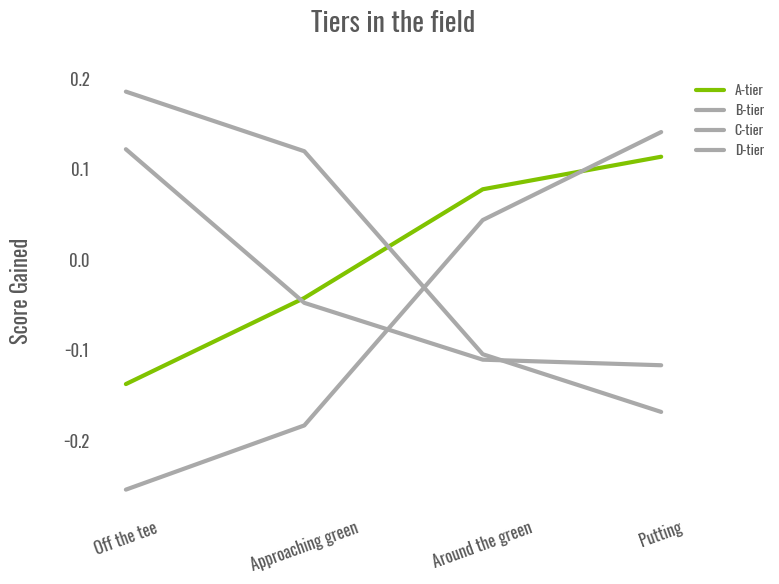

In [218]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['SG:OTT',
       'SG:APR', 'SG:ARG', 'Average SG Putts', 'cluster'],
                  var_name='Metric', value_name='Value')


plt.figure(figsize=(8,6))
sns.lineplot(data=long_df, x='Metric', y='Value', hue='cluster', palette=[pga[0], "#A9A9A9", "#A9A9A9", "#A9A9A9"], hue_order=tier, errorbar=None, linewidth=3)
plt.title("Tiers in the field\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("", fontsize=15)
plt.ylabel("Score Gained\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

custom_labels = ['Off the tee', 'Approaching green', 'Around the green', 'Putting']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=20)

sns.despine(top=True,
    right=True,
    left=True,
    bottom=True,
    #offset=None,
    trim=True)

#plt.show()

plt.tight_layout()
plt.savefig(path + "/graphs/line-A.png", transparent=True, dpi=300)

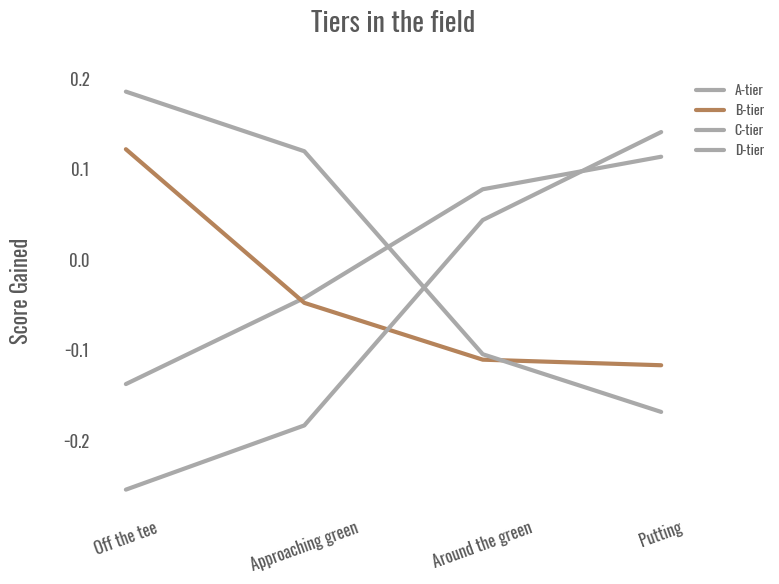

In [219]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['SG:OTT',
       'SG:APR', 'SG:ARG', 'Average SG Putts', 'cluster'],
                  var_name='Metric', value_name='Value')


plt.figure(figsize=(8,6))
sns.lineplot(data=long_df, x='Metric', y='Value', hue='cluster', palette=["#A9A9A9", pga[1], "#A9A9A9", "#A9A9A9"], hue_order=tier, errorbar=None, linewidth=3)
plt.title("Tiers in the field\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("", fontsize=15)
plt.ylabel("Score Gained\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

custom_labels = ['Off the tee', 'Approaching green', 'Around the green', 'Putting']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=20)

sns.despine(top=True,
    right=True,
    left=True,
    bottom=True,
    #offset=None,
    trim=True)

#plt.show()

plt.tight_layout()
plt.savefig(path + "/graphs/line-B.png", transparent=True, dpi=300)

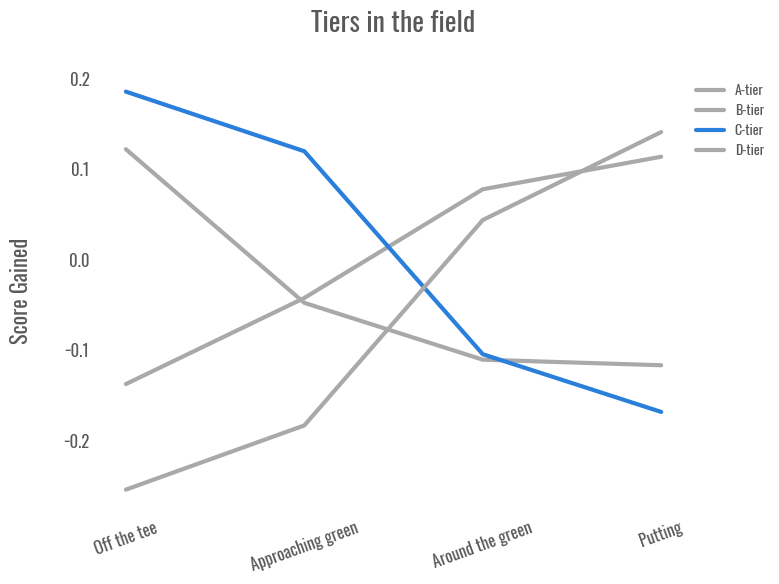

In [220]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['SG:OTT',
       'SG:APR', 'SG:ARG', 'Average SG Putts', 'cluster'],
                  var_name='Metric', value_name='Value')


plt.figure(figsize=(8,6))
sns.lineplot(data=long_df, x='Metric', y='Value', hue='cluster', palette=["#A9A9A9", "#A9A9A9", pga[2], "#A9A9A9"], hue_order=tier, errorbar=None, linewidth=3)
plt.title("Tiers in the field\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("", fontsize=15)
plt.ylabel("Score Gained\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

custom_labels = ['Off the tee', 'Approaching green', 'Around the green', 'Putting']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=20)

sns.despine(top=True,
    right=True,
    left=True,
    bottom=True,
    #offset=None,
    trim=True)

#plt.show()

plt.tight_layout()
plt.savefig(path + "/graphs/line-C.png", transparent=True, dpi=300)

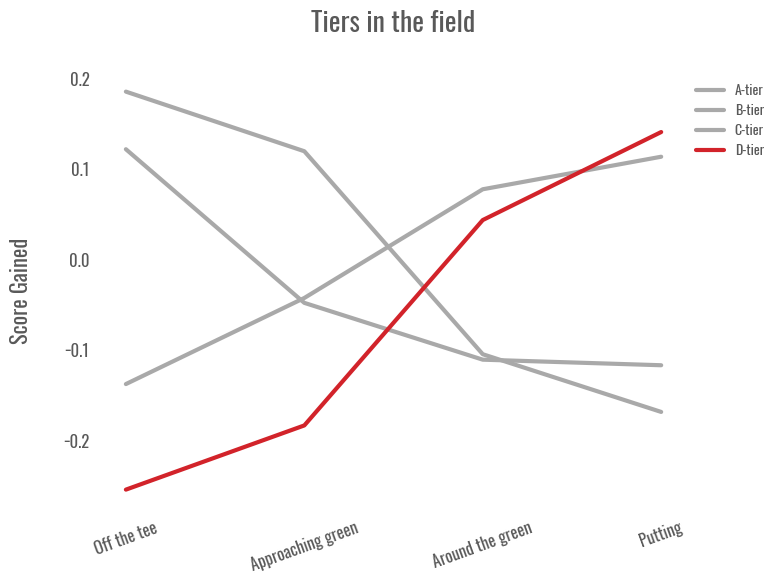

In [221]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['SG:OTT',
       'SG:APR', 'SG:ARG', 'Average SG Putts', 'cluster'],
                  var_name='Metric', value_name='Value')


plt.figure(figsize=(8,6))
sns.lineplot(data=long_df, x='Metric', y='Value', hue='cluster', palette=["#A9A9A9", "#A9A9A9", "#A9A9A9", pga[3]], hue_order=tier, errorbar=None, linewidth=3)
plt.title("Tiers in the field\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("", fontsize=15)
plt.ylabel("Score Gained\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

custom_labels = ['Off the tee', 'Approaching green', 'Around the green', 'Putting']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=20)

sns.despine(top=True,
    right=True,
    left=True,
    bottom=True,
    #offset=None,
    trim=True)

#plt.show()

plt.tight_layout()
plt.savefig(path + "/graphs/line-D.png", transparent=True, dpi=300)

/var/folders/j_/__64n8zj7cl2_v79xs0k7lpm0000gn/T/ipykernel_54072/1082559967.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=long_df, x='Metric', y='Value', hue='cluster', palette=pga, hue_order=tier, errorbar=None, linewidth=3)


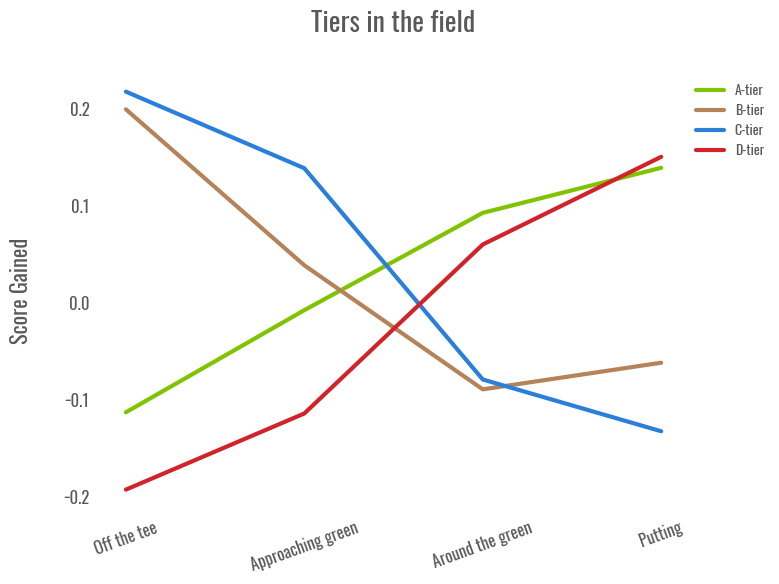

In [222]:
long_df = pd.melt(df10, id_vars=['cluster'], value_vars=['SG:OTT',
       'SG:APR', 'SG:ARG', 'Average SG Putts', 'cluster'],
                  var_name='Metric', value_name='Value')


plt.figure(figsize=(8,6))
sns.lineplot(data=long_df, x='Metric', y='Value', hue='cluster', palette=pga, hue_order=tier, errorbar=None, linewidth=3)
plt.title("Tiers in the field\n", fontsize=20, color=tc)
plt.xticks(fontsize=12, color=tc)
plt.yticks(fontsize=12, color=tc)
plt.xlabel("", fontsize=15)
plt.ylabel("Score Gained\n", fontsize=16, color=tc)
plt.legend(bbox_to_anchor=(1.15, 1))

custom_labels = ['Off the tee', 'Approaching green', 'Around the green', 'Putting']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=20)

sns.despine(top=True,
    right=True,
    left=True,
    bottom=True,
    #offset=None,
    trim=True)

#plt.show()

plt.tight_layout()
plt.savefig(path + "/graphs/line10.png", transparent=True, dpi=300)

## What golfer is in what tier?

In [183]:
df.loc[df["Player Name"] == "Tiger Woods"] # "The Artist"

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
395,Tiger Woods,137.0,61.64,300.5,67.49,28.7,63.665,69.127,3431,3.0,11.0,0.3025,1.953,0.307,1.0535,0.2895,11576999,2,A-tier,1


In [184]:
df.loc[df["Player Name"] == "Henrik Stenson"]

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
164,Henrik Stenson,295.0,69.62,292.3,70.678,29.78,58.212,69.7248,4360,0.0,19.0,0.0336,1.3776,0.5156,0.7704,0.0576,16509129,5,C-tier,1


In [185]:
df.loc[df["Player Name"] == "Phil Mickelson"] # Can get out of any situation, awful fairway pct tho

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
311,Phil Mickelson,703.0,54.915556,295.855556,64.827778,28.477778,60.86,70.037778,12351,6.0,41.0,0.310444,1.092556,0.009778,0.524444,0.248333,32317468,9,D-tier,1


In [186]:
df.loc[df["Player Name"] == "Dustin Johnson"] 

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
133,Dustin Johnson,583.0,56.47375,311.975,68.0125,28.95625,57.9125,69.706125,13546,11.0,52.0,0.032625,1.374875,0.8005,0.549375,-0.019125,42088309,8,B-tier,1


In [187]:
df.loc[df["Player Name"] == "John Daly"]

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
205,John Daly,113.0,53.995,306.2,63.87,29.335,53.04,71.288,395,0.0,1.0,-0.2305,-0.6975,0.304,-0.3205,-0.451,647092,2,B-tier,1


In [188]:
df.loc[df["Player Name"] == "Rory McIlroy"] 

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
335,Rory McIlroy,420.0,58.417143,309.428571,67.05,28.817143,59.765714,69.545286,9482,7.0,43.0,-0.062429,1.525143,0.959571,0.476143,0.132857,33315834,7,B-tier,1


In [189]:
df.loc[df["Player Name"] == "Jordan Spieth"] 

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
218,Jordan Spieth,430.0,61.152,293.86,66.674,28.358,62.154,69.5768,8709,6.0,33.0,0.3166,1.368,0.3278,0.4432,0.2674,25987607,5,A-tier,1


In [190]:
df.loc[df["Player Name"] == "Bubba Watson"] # Bombs drives

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
71,Bubba Watson,686.0,57.793333,311.411111,68.377778,29.464444,55.94,70.185444,13773,12.0,40.0,-0.114,0.998778,0.965444,0.235667,-0.092333,36804576,9,B-tier,1


In [200]:
test = df.pivot_table(index="cluster", 
        
        values=['Rounds', 'Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points', 
       'Average SG Putts', 'Average SG Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'Money'], 
        
        aggfunc={'Rounds': "sum", 'Fairway Percentage': "mean", 'Avg Distance': "mean",
       'gir': "mean", 'Average Putts': "mean", 'Average Scrambling': "mean", 
       'Average Score': "mean", 'Points': "sum", 'Average SG Putts': "mean", 
       'Average SG Total': "mean", 'SG:OTT': "mean", 'SG:APR': "mean", 
       'SG:ARG': "mean", 'Money': "sum"})

test

,Average Putts,Average SG Putts,Average SG Total,Average Score,Average Scrambling,Avg Distance,Fairway Percentage,Money,Points,Rounds,SG:APR,SG:ARG,SG:OTT,gir
cluster,,,,,,,,,,,,,,
A-tier,28.989048,0.113895,0.011893,71.043106,59.595234,282.662088,65.266573,800312798,347850,42959.0,-0.042050,0.077960,-0.137104,64.848064
B-tier,29.395994,-0.116325,-0.152295,71.234008,55.612554,298.806883,57.447764,618747562,251011,30006.0,-0.047450,-0.110174,0.122187,65.712577
C-tier,29.671218,-0.167871,0.034659,71.034542,56.787742,291.139432,64.248235,593209336,249752,32195.0,0.119950,-0.104143,0.185766,67.889447
D-tier,28.829162,0.141160,-0.251486,71.301235,57.987196,290.321021,57.168083,439912544,195273,26375.0,-0.182771,0.043974,-0.253651,62.905030
